Import necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

Load the breast cancer dataset

In [4]:
data = load_breast_cancer()
X = data.data

Step 1: Standardize the Data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 2: Compute the Covariance Matrix

In [6]:
cov_matrix = np.cov(X_scaled.T)

Step 3: Calculate the Eigenvalues and Eigenvectors of the Covariance Matrix

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Step 4: Sort Eigenvalues and Eigenvectors

In [8]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Extract the sorted eigenvalues and eigenvectors

In [9]:
sorted_eigenvalues = np.array([eigen_pairs[i][0] for i in range(len(eigenvalues))])
sorted_eigenvectors = np.array([eigen_pairs[i][1] for i in range(len(eigenvectors))]).T

Step 5: Project the Data Onto the Principal Components
Assuming we want to reduce to 2 dimensions

In [10]:
matrix_w = np.hstack((eigen_pairs[0][1].reshape(len(data.feature_names),1),
                      eigen_pairs[1][1].reshape(len(data.feature_names),1)))
X_pca = X_scaled.dot(matrix_w)

Visualization of PCA in a 2D chart

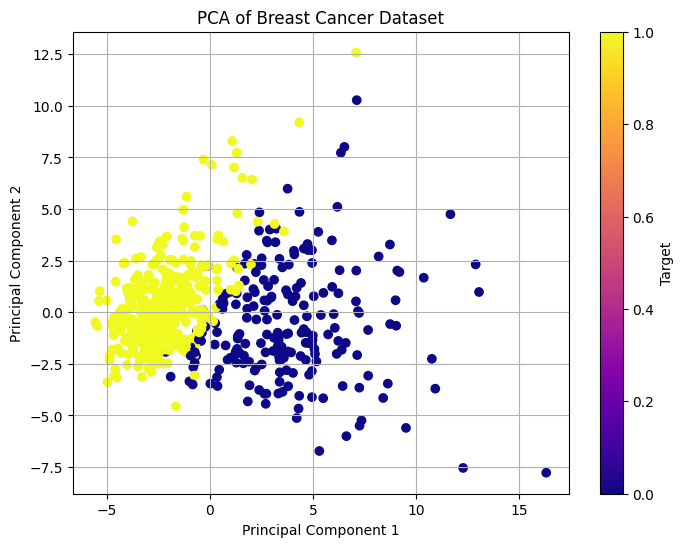

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


Displaying sorted eigenvalues

In [12]:
print("Sorted Eigenvalues: ", sorted_eigenvalues)

Sorted Eigenvalues:  [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]
